# Plotting sequence length and GC content
Here we will show some more examples of sequence parsing, using the Bio.SeqIO module described in one of the previous videos, plus the Python library matplotlib’s pylab plotting interface

### Get data

In [1]:
!wget https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta

--2024-11-02 04:15:40--  https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76480 (75K) [text/plain]
Saving to: ‘ls_orchid.fasta’

ls_orchid.fasta     100%[===================>]  74.69K  --.-KB/s    in 0.02s   

2024-11-02 04:15:41 (3.30 MB/s) - ‘ls_orchid.fasta’ saved [76480/76480]



In [6]:
!wc -l ls_orchid.fasta
print("-"*100)
# first sample in file
!head -n 13 ls_orchid.fasta
print("-"*100)
# last sample in file
!tail -n 12 ls_orchid.fasta
print("-"*100)
# counting data
!grep -c '^>gi' ls_orchid.fasta

1197 ls_orchid.fasta
----------------------------------------------------------------------------------------------------
>gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTG
AATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGG
CCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAA
AGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGA
ATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGAT
AAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCA
GGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCC
AGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGT
TTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTT
GTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGAT
GTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC

-------------------------------------------

### Parse FASTA file

In [ ]:
!pip install biopython
from Bio import SeqIO

# sequences = []
# for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
#     sequences.append(seq_record.seq)

def parse_FASTA(path_file:str)->list:
    """
    Parse path file and return list of Bio.Seq.Seq objects.

    Parameters
    ----------
    path : str
        path file FASTA.

    Returns
    -------
    list
        list of Bio.Seq.Seq objects.

    Raises
    ------
    ModuleNotFoundError:
        No module named 'Bio', pip install biopython

    FileNotFoundError
        No such file or directory
    """
    return [seq_record.seq for seq_record in SeqIO.parse(path_file, "fasta")]

In [ ]:
sequences = []
%time sequences = parse_FASTA("ls_orchid.fasta")
print(f"sequences type : {type(sequences)}")
print(f"sequences[0] type :{type(sequences[0])}")
print(f"len sequences :{len(sequences)}")
max_seq_index = sequences.index(max(sequences, key=len))
print(f"seq with max len : sequences[{max_seq_index}] len = {len(sequences[max_seq_index])}")
min_seq_index = sequences.index(min(sequences, key=len))
print(f"seq with min len : sequences[{min_seq_index}] len = {len(sequences[min_seq_index])}")

CPU times: user 2.57 ms, sys: 809 µs, total: 3.38 ms
Wall time: 4.22 ms
sequences type : <class 'list'>
sequences[0] type :<class 'Bio.Seq.Seq'>
len sequences :94
seq with max len : sequences[37] len = 789
seq with min len : sequences[51] len = 572


In [ ]:
from pprint import pprint
pprint(sequences[0:3])
pprint(sequences[0].count("GC"))

[Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA')]
70


### Histogram of sequence lengths

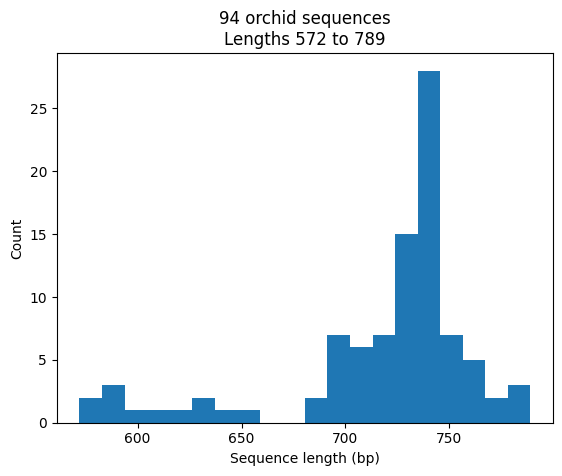

In [ ]:
sizes = [len(rec) for rec in sequences]

import matplotlib.pyplot as plt
plt.hist(sizes, bins=20)
plt.title(f"{len(sizes)} orchid sequences\nLengths {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")
plt.show()

Notice that most of these orchid sequences are about 740 bp long!

### Plot of sequence GC%
Having read in each sequence and calculated the GC%, we will sort them into ascending order.

GC refers to the two nucleotide bases Guanine (G) and Cytosine (C) that are found in DNA (Deoxyribonucleic acid) and RNA (Ribonucleic acid) molecules.

In DNA, the four nucleotide bases are:

1. Adenine (A)
2. Guanine (G)
3. Cytosine (C)
4. Thymine (T)

In RNA, the four nucleotide bases are:

1. Adenine (A)
2. Guanine (G)
3. Cytosine (C)
4. Uracil (U)

The GC content of a DNA or RNA molecule refers to the proportion of G and C bases relative to the total number of bases. GC-rich regions of DNA are typically more stable and have a higher melting point than AT-rich regions.

GC content is an important characteristic of DNA and RNA molecules, and it can affect various biological processes, such as:

* DNA replication and repair
* Gene expression and regulation
* Protein binding and interaction
* Evolutionary conservation and divergence

GC content can also be used to identify and classify different types of DNA and RNA molecules, such as:

* GC-rich genes and regulatory elements
* AT-rich repetitive sequences
* GC-poor non-coding regions

In the context of the `gc_fraction` function from Biopython, the GC fraction is calculated as the ratio of G and C bases to the total number of bases in a DNA or RNA sequence.

In the context of the `gc_fraction` function from Biopython, the GC fraction is calculated as:

GC fraction = (Number of G bases + Number of C bases) / Total number of bases

This calculation is typically expressed as a decimal value between 0 and 1, where:

* 0 represents 0% GC content (i.e., no G or C bases)
* 1 represents 100% GC content (i.e., only G and C bases)
* 0.5 represents 50% GC content (i.e., equal numbers of G, C, A, and T bases)

For example, if a DNA sequence has 10 G bases, 10 C bases, 10 A bases, and 10 T bases, the GC fraction would be:

GC fraction = (10 + 10) / (10 + 10 + 10 + 10) = 20 / 40 = 0.5

This means that the DNA sequence has a GC content of 50%.

In [ ]:
# from Bio.SeqUtils import GC
# ImportError: cannot import name 'GC' from 'Bio.SeqUtils' (/usr/local/lib/python3.10/dist-packages/Bio/SeqUtils/__init__.py)
from Bio.SeqUtils import gc_fraction as GC
# multiply in 100 for percentage
gc_values = sorted(GC(rec)*100 for rec in sequences)

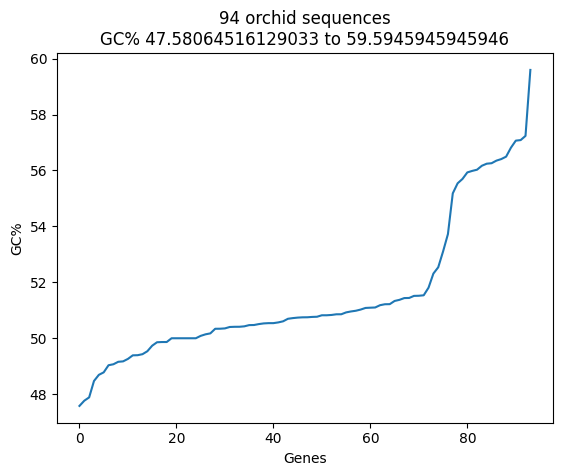

In [ ]:
plt.plot(gc_values)
plt.title(f"{len(gc_values)} orchid sequences\nGC% {min(gc_values)} to {max(gc_values)}")
plt.xlabel("Genes")
plt.ylabel("GC%")
plt.show()

# Additionaly why does gc_fraction are important?
GC fraction is important in various fields of biology and bioinformatics because it can affect the structure, function, and evolution of DNA and RNA molecules. Here are some reasons why GC fraction is important:

1. **DNA stability**: GC-rich regions of DNA are more stable and have a higher melting point than AT-rich regions. This is because G-C base pairs have three hydrogen bonds, whereas A-T base pairs have only two.
2. **Gene regulation**: GC-rich regions are often associated with gene regulatory elements, such as promoters and enhancers. These regions can bind transcription factors and other proteins that regulate gene expression.
3. **Evolutionary conservation**: GC-rich regions are often conserved across different species, suggesting that they play important roles in evolution.
4. **DNA replication and repair**: GC-rich regions can be more difficult to replicate and repair than AT-rich regions, which can lead to genetic instability.
5. **Protein binding**: GC-rich regions can bind proteins that play important roles in gene regulation, DNA replication, and repair.
6. **Microarray analysis**: GC fraction can affect the hybridization of DNA probes to microarrays, which can impact the accuracy of gene expression analysis.
7. **PCR amplification**: GC-rich regions can be more difficult to amplify by PCR (polymerase chain reaction) than AT-rich regions, which can impact the accuracy of genetic analysis.
8. **Genome assembly**: GC fraction can affect the assembly of genomes from next-generation sequencing data.
9. **Epigenetics**: GC-rich regions can be associated with epigenetic marks, such as DNA methylation, which can impact gene expression.
10. **Disease association**: GC-rich regions have been associated with various diseases, such as cancer and neurological disorders.

Overall, GC fraction is an important characteristic of DNA and RNA molecules that can impact their structure, function, and evolution.